<a href="https://colab.research.google.com/github/charann90/Netflix-Movies-and-TV-Shows-Clustering/blob/main/netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, you are required to do**




*   Exploratory Data Analysis

*   Understanding what type content is available in different countries

*   Has Netflix increasingly focused on TV as compared to movies in recent years?
*   Clustering similar content by matching text-based features





**Data Description**

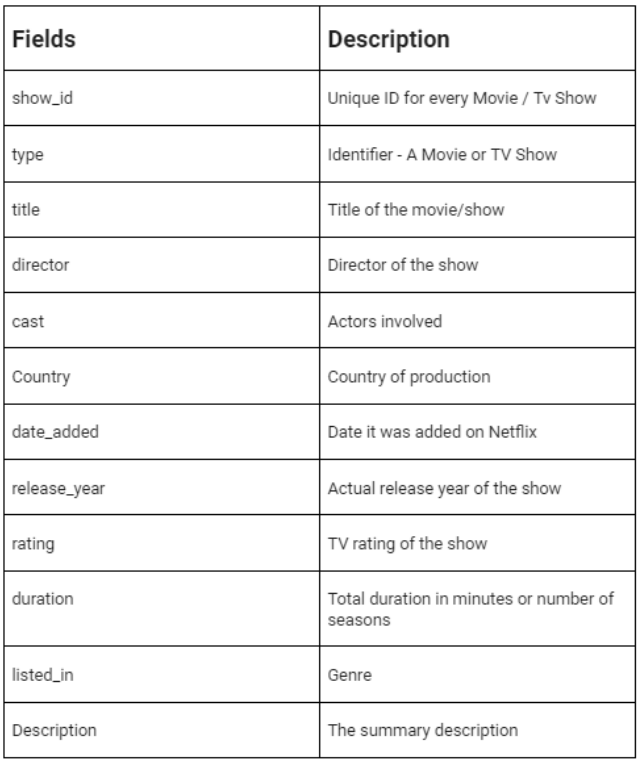

# Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Data uploading

In [2]:
#uploading and reading the data
df=pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Data Wrangling

In [3]:
#getting the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
#understanding the statistical information
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


# Data Cleaning

In [5]:
#checking the null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In the given data 5 features are having null values which need to be corrected

In [6]:
#dropping and replacing null valuse for different columns

#dropping null values of date_added and rating column as it has only single digit null values
df.dropna(subset=['date_added','rating'],inplace=True)
#replacing null values in director column by unknown
df['director'].fillna('unknown',inplace=True)
#replacing null values in country column by mode value of it
df['country'].fillna(df['country'].mode()[0],inplace=True)
#replacing null values in cast column by no cast
df['cast'].fillna('no cast',inplace=True)


In [7]:
#dropping unnessasary columns
df.drop(['show_id'],axis=1,inplace=True)

In [8]:
#checking null values after cleaning
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# EDA

Type of content available in different countries:

In [9]:
#count of type of content present in diffrent countries
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

We can see that movie content is double the number of TV shows

In [10]:
import seaborn as sns

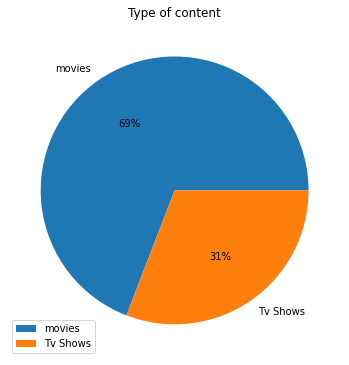

In [14]:
#plotting the type of content in the form of pie plot
plt.figure(figsize=(6,7))
plt.pie(df['type'].value_counts(),labels=['movies','Tv Shows'],autopct='%1.0f%%')
plt.title('Type of content')
plt.legend()
plt.show()


There are 69% of movie content and 31% of Tv show content in netflix

In [15]:
#replacing and converting datatype of duration column to integer

df['duration']=df['duration'].str.replace('Season','')
df['duration']=df['duration'].str.replace('s','')

In [16]:
#Replacing and converting datatype of duration column to integer
df['duration']=df['duration'].str.replace('min','')

df['duration']=df['duration'].astype(str).astype(int)

In [17]:
#creating a variable column for each type seperately
tv_shows=df[df['type']=='TV Show']
movie=df[df['type']=='Movie']

In [18]:
#count of movie and tv shows for different countries
df['country'].value_counts()

United States                                                   3051
India                                                            923
United Kingdom                                                   396
Japan                                                            224
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [19]:
#percentage of ovreall share of movie/tvshow content for the top 10 countries 
df['country'].value_counts().nlargest(10).sum()/len(df)*100

69.54954954954955


*   Content of top 10 countries accounts for 69.54% for overall contents present




In [20]:
#crreating a movie variable for seperated type of content grouping with countries
country_movie=pd.DataFrame(movie.groupby(['country'])['type'].size().sort_values(ascending=False))

In [21]:
#renaming the column
country_movie.rename(columns={'type':'count'})

,count
country,
United States,2076
India,852
United Kingdom,193
Canada,118
Spain,89
...,...
"India, Switzerland",1
"India, Pakistan",1
"India, Nepal",1


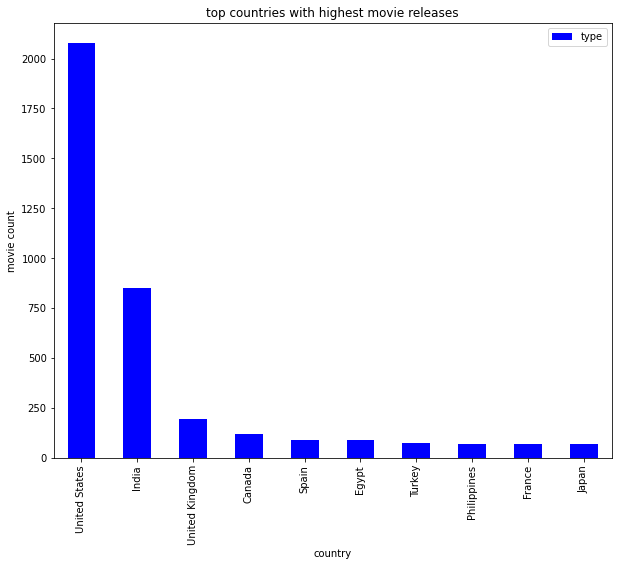

In [22]:
#plotting movie counts of top countries
country_movie.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest movie releases',color='b',ylabel='movie count')



**United Nations has highest movie content released and then followed by India** 




In [23]:
#creating a tvshow  variable for seperated tv shows type of content grouping with countries

country_tvshow=pd.DataFrame(tv_shows.groupby(['country'])['type'].size().sort_values(ascending=False))

In [24]:
#renaming the column
country_tvshow.rename(columns={'type':'count'})

,count
country,
United States,975
United Kingdom,203
Japan,155
South Korea,147
India,71
...,...
"Mexico, Spain",1
"China, Hong Kong",1
"Mauritius, South Africa",1


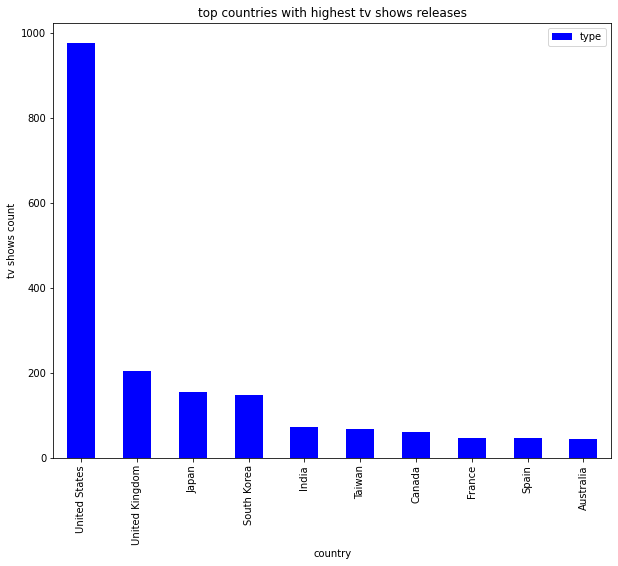

In [25]:
#plotting tv show counts of top countries
country_tvshow.head(10).plot(kind='bar',figsize=(10,8),title='top countries with highest tv shows releases',color='b',ylabel='tv shows count')

 **United Nations has highest tv show content released and then followed by United Kingdom**





---





In [26]:
num_col=['show_id','type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description']

In [27]:
#comparing type of content in different years
release_df=df.groupby(['release_year','type'])['release_year'].count().unstack()

In [28]:
release_df.tail(10)

type,Movie,TV Show
release_year,,
2012,158.0,60.0
2013,202.0,63.0
2014,244.0,90.0
2015,380.0,156.0
2016,642.0,239.0
2017,742.0,268.0
2018,734.0,386.0
2019,582.0,414.0
2020,411.0,457.0


Text(0.5, 0, 'Release year ')

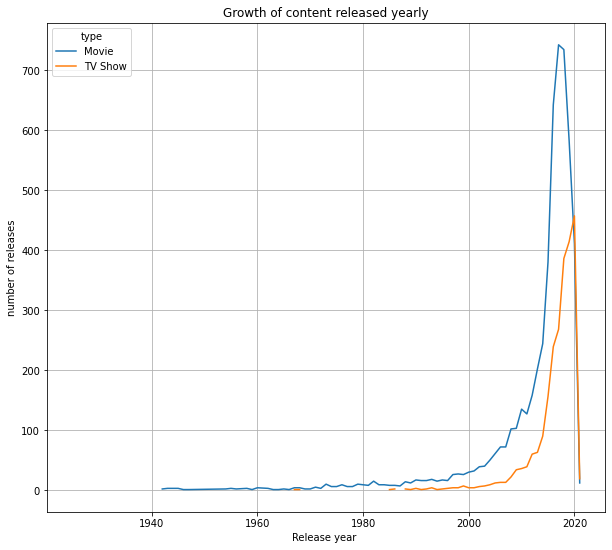

In [29]:
#plotting sum of contentent released in different years
release_df.plot(figsize=(10,9),grid=True)
plt.title('Growth of content released yearly')
plt.ylabel('number of releases')
plt.xlabel('Release year ')



*   Netflix started releasing movies after 1940 and after 1980 Tv show content was started streaming.
*   we can see that there is a graduall increase in releases after 2000 where movie content releases are more then Tv show content




In [30]:
#creating seperate columns for month and year from release date column
df['month']=pd.DatetimeIndex(df['date_added']).month
df['year']=pd.DatetimeIndex(df['date_added']).year
df.drop(['release_year'],axis=1,inplace=True)

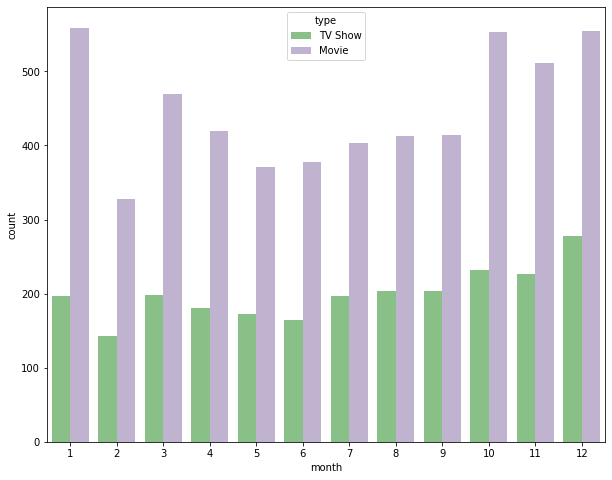

In [31]:
#plotting monthly content released for both movies and Tv shows
plt.figure(figsize=(10,8))
sns.countplot(x='month',hue='type',data=df,palette="Accent")



*   It is concluded that in the month of january, october and december maximum 
movies/tvshows has been released.




**Top Movie/TV Show content type with respect to duration**

In [ ]:
#plotting distribution plot for duration to see the frequency distribution 
plt.figure(figsize=(10,8))
sns.distplot(df['duration'],bins=30)
plt.title('length distribution of movies',fontsize=15)

The mean duration of movies are 100 minutes

In [ ]:
#creating a table for movies with highest duration
long_movies=movie[['title','duration']]
long_movies.sort_values(by=['duration'],ascending=False)



*   Black Mirror: Bandersnatch	is the longest movie which is 312 minutes long and the second is The School of Mischief	.




In [ ]:
#creating a table for Tv shows with highest duration
long_tv_shows=tv_shows[['title','duration']]
long_tv_shows.sort_values(by=['duration'],ascending=False)



*  Grey's Anatomy		is longest Tv show which has 16 seasons and followed by Supernatural which has 15 seasons




**Most occured Categories for movies and Tv shows**

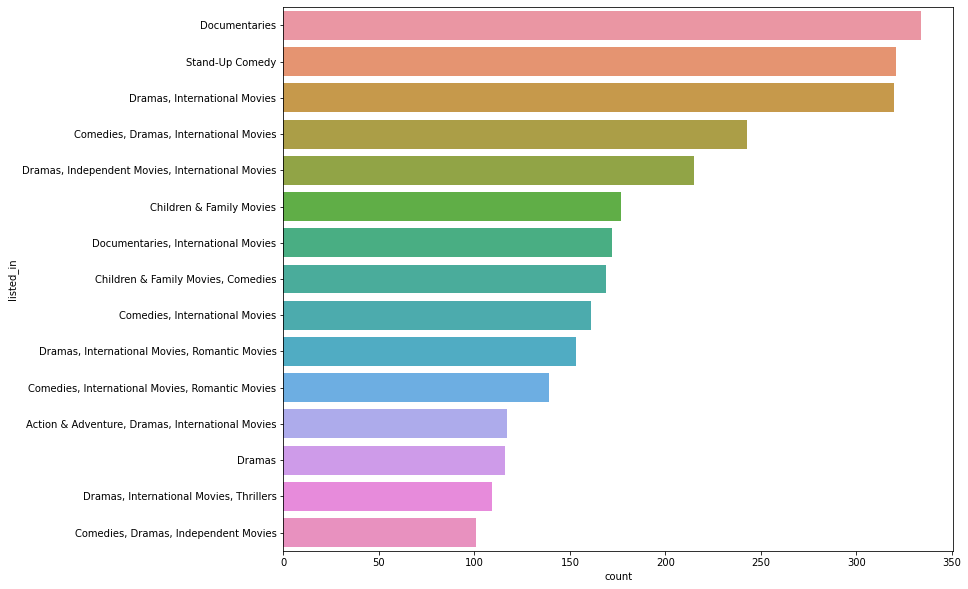

In [32]:
#top categories of movies
plt.figure(figsize=(12,10))
sns.countplot(y=movie['listed_in'],data=df,order=movie['listed_in'].value_counts().index[:15])



*   Movies which are documentaries and stand up comedy has highest content in netflix



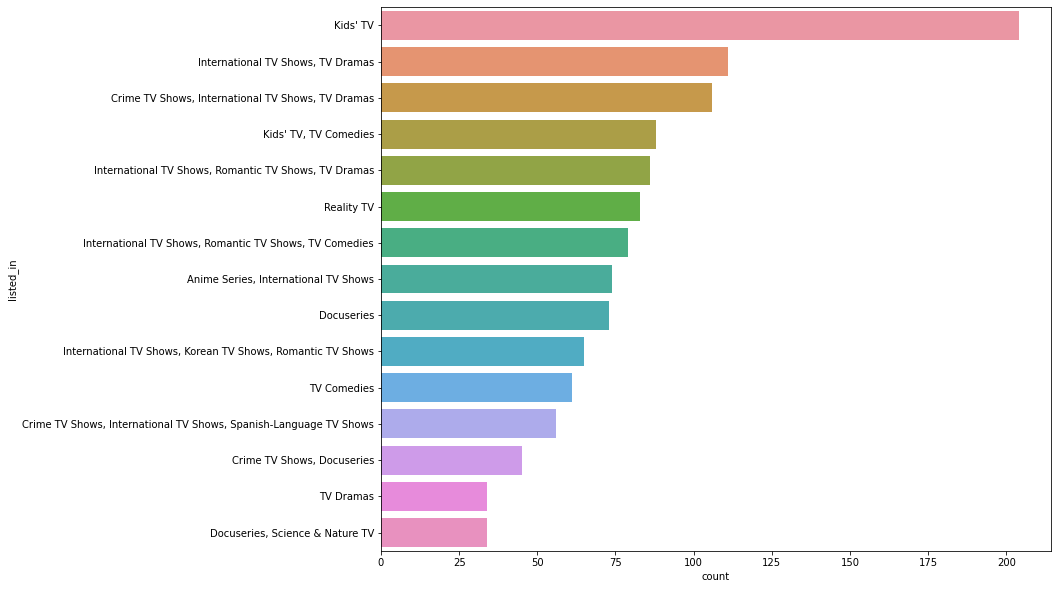

In [33]:
#top categories of Tv shows
plt.figure(figsize=(12,10))
sns.countplot(y=tv_shows['listed_in'],data=df,order=tv_shows['listed_in'].value_counts().index[:15])



*   Tv shows for kids category has highest content in netflix




**Most popular ratings for Tvshows/Movies**



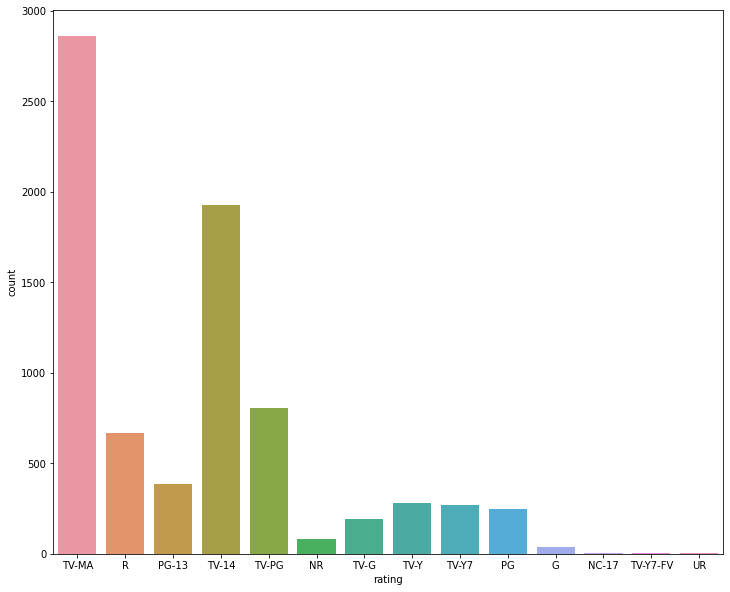

In [34]:
#plotting top movie content rating 
plt.figure(figsize=(12,10))
sns.countplot(df['rating'])



*   Most of the contents got rating TV_MA(Mature Audience) and the second most rated contents is for Tv-14(excludes children)



In [35]:
df.head(5)

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


In [36]:
df.shape

(7770, 12)

In [37]:
df.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020


In [ ]:
#plotting heat map to find out strengnth between the variables
plt.figure(figsize=(15,15))
sns.heatmap(round(df.corr(),2),cmap='Greens',annot=True)

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
#merging all the text columns
df['clustered_data']=(df['listed_in']+' '+df['cast'])
#clustered_df.set_index('title',inplace=True)
df.head()

,type,title,director,cast,country,date_added,rating,duration,listed_in,description,month,year,clustered_data
0,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,2016,"Dramas, International Movies Demián Bichir, Hé..."
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,2018,"Horror Movies, International Movies Tedd Chan,..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",11,2017,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123,Dramas,A brilliant group of students become card-coun...,1,2020,"Dramas Jim Sturgess, Kevin Spacey, Kate Boswor..."


In [39]:
df['clustered_data'][8]

'Horror Movies, International Movies Divya Dutta, Atul Kulkarni, Mohan Agashe, Anupam Shyam, Raayo S. Bakhirta, Yashvit Sancheti, Greeva Kansara, Archan Trivedi, Rajiv Pathak'

In [41]:
import string

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer


In [43]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Feature Engineering and data preprocessing

**Removing punctuations for the text column**

In [44]:
#removing punctuations from the clustered data
def remove_punctuations(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)
df['clustered_data']=df['clustered_data'].apply(remove_punctuations)  

In [45]:
df['clustered_data']

0       International TV Shows TV Dramas TV SciFi  Fan...
1       Dramas International Movies Demián Bichir Héct...
2       Horror Movies International Movies Tedd Chan S...
3       Action  Adventure Independent Movies SciFi  Fa...
4       Dramas Jim Sturgess Kevin Spacey Kate Bosworth...
                              ...                        
7782    Dramas International Movies Imad Creidi Antoin...
7783    Dramas International Movies Music  Musicals Vi...
7784    Documentaries International Movies Music  Musi...
7785    International TV Shows Reality TV Adriano Zumb...
7786                Documentaries Music  Musicals no cast
Name: clustered_data, Length: 7770, dtype: object

**Removing stop words**

In [46]:
#removing all thne stopwords from the clustered data
sw = nltk.corpus.stopwords.words('english')
def stopword(txt):
  description=[word.lower() for word in txt.split() if word.lower() not in sw]
  return ' '.join(description)

df['clustered_data']=df['clustered_data'].apply(stopword)

In [47]:
df['clustered_data']

0       international tv shows tv dramas tv scifi fant...
1       dramas international movies demián bichir héct...
2       horror movies international movies tedd chan s...
3       action adventure independent movies scifi fant...
4       dramas jim sturgess kevin spacey kate bosworth...
                              ...                        
7782    dramas international movies imad creidi antoin...
7783    dramas international movies music musicals vic...
7784    documentaries international movies music music...
7785    international tv shows reality tv adriano zumb...
7786                    documentaries music musicals cast
Name: clustered_data, Length: 7770, dtype: object

In [ ]:
'''def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)'''

In [49]:
df['clustered_data']

0       international tv shows tv dramas tv scifi fant...
1       dramas international movies demián bichir héct...
2       horror movies international movies tedd chan s...
3       action adventure independent movies scifi fant...
4       dramas jim sturgess kevin spacey kate bosworth...
                              ...                        
7782    dramas international movies imad creidi antoin...
7783    dramas international movies music musicals vic...
7784    documentaries international movies music music...
7785    international tv shows reality tv adriano zumb...
7786                    documentaries music musicals cast
Name: clustered_data, Length: 7770, dtype: object

In [50]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer


**Stemming**

In [52]:
#stemming all the text data for  better understanding 
stemmer = SnowballStemmer('english')
def stemming(text):
  stemmer = SnowballStemmer('english')
  description=[stemmer.stem(word) for word in text.split()]

  return ' '.join(description)

df['clustered_data']=df['clustered_data'].apply(stemming)  

**Tokenizing the data**

In [53]:
#calling a function to give token values for each word in a sentence
def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)

**Lemmatization**

In [54]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [55]:
#defining a function to lammatize the words
def lemma(txt):
    lemma=WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in txt]
    x=" ".join(description)
    return x
#applying the function    
df['clustered_data']=df['clustered_data'].apply(lemma)    

Text(0.5, 1.0, 'word cloud')

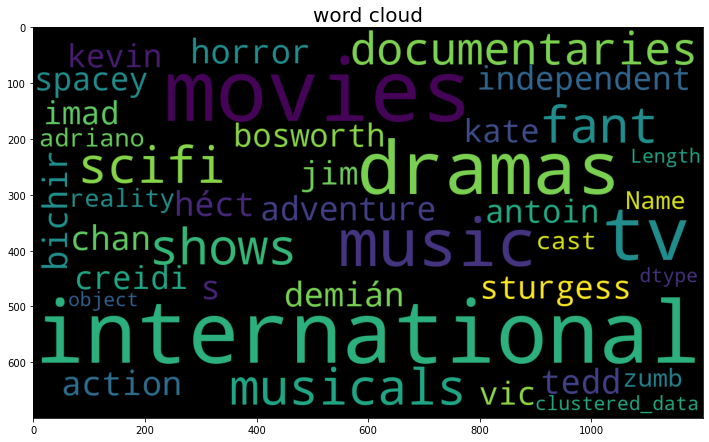

In [48]:
from wordcloud import WordCloud
#generating the word cloud for the text data
wordcloud=WordCloud(background_color = 'black',width = 1200,height = 700).generate(str(df['clustered_data']))

plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.title('word cloud',fontsize=20)


In [56]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
df['clustered_data'].head()

0    intern tv show tv drama tv scifi fantasi joão ...
1    drama intern movi demián bichir héctor bonilla...
2    horror movi intern movi tedd chan stella chung...
3    action adventur independ movi scifi fantasi el...
4    drama jim sturgess kevin spacey kate bosworth ...
Name: clustered_data, dtype: object

In [58]:
from sklearn.feature_extraction.text import CountVectorizer


**Getting Frequency of each word by applying countvectorizer** 

In [59]:
#defining function for word frequency count
count_vectorizer=CountVectorizer()
cv=count_vectorizer.fit(df['clustered_data'])


dictionary=cv.vocabulary_.items()

In [ ]:
dictionary

In [60]:
#creating a list of word and it's count value in a the form of a dataframe
word=[]
count=[]
for value, key in dictionary:
  word.append(value)
  count.append(key)

In [61]:
#Dataframe which is sorted by their value count
freq_df=pd.DataFrame({'word':word,'count':count}).sort_values(by='count',ascending=False)
freq_df

,word,count
15989,ṣọpẹ,29230
28149,żurawski,29229
26652,żulewska,29228
24030,źak,29227
12881,şükrü,29226
...,...,...
27453,aabha,4
11892,50,3
1125,4minut,2
12024,390,1


In [62]:
top_words=freq_df.head(20)

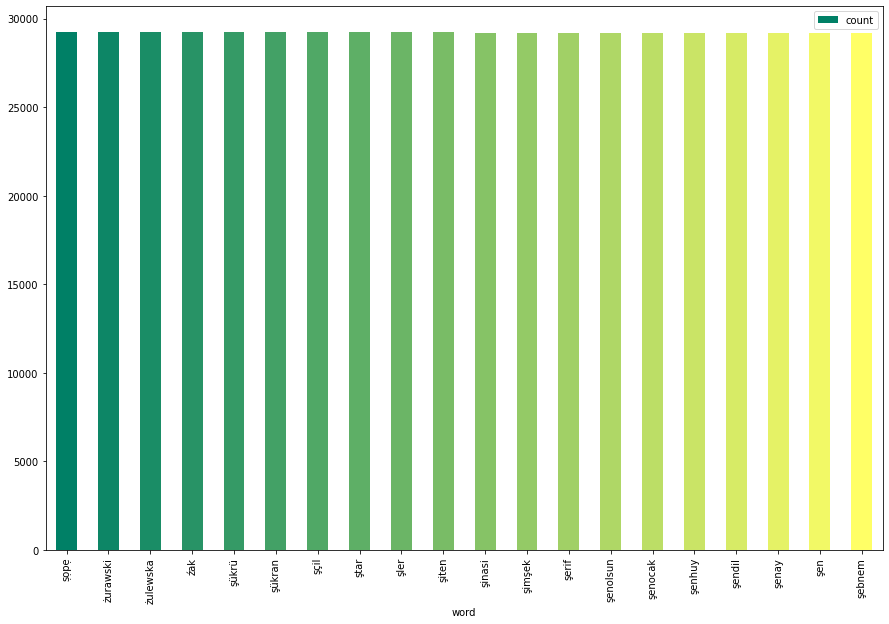

In [63]:
#plotting the top 20 words which is largely repeated
top_words.plot(kind='bar',x='word',y='count',figsize=(15,10),color = plt.cm.summer(np.linspace(0, 1, 20)))

In [64]:
from sklearn.preprocessing import StandardScaler


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk

In [66]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from nltk.tokenize import TweetTokenizer


In [ ]:
'''def tokenizer(text):
  word_tokens=word_tokenize(text)
  return word_tokens

df['clustered_data']=df['clustered_data'].apply(tokenizer)'''

In [ ]:
#df['clustered_data']=df['clustered_data'].apply(nltk.word_tokenize)

In [ ]:
#scalar=StandardScaler()
#rescaled_c=scalar.fit_transform(cluster)


In [ ]:
'''def identity_tokenizer(text):
    return text'''

# TFID

In [67]:
#creating the object for tfid vectoriser
tfid=TfidfVectorizer(stop_words='english',lowercase=False,max_features=2000)
x_tfid=tfid.fit_transform(df['clustered_data'])

In [68]:
x_tfid

<7770x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 81445 stored elements in Compressed Sparse Row format>

In [69]:
#converting the metrix into array
x=x_tfid.toarray()

In [70]:
#calling all the feature names
tfid.get_feature_names()

['aamir',
 'aaron',
 'abbi',
 'abdel',
 'abdullah',
 'abel',
 'abhay',
 'abhishek',
 'abigail',
 'abou',
 'abraham',
 'action',
 'adam',
 'adel',
 'adesua',
 'adil',
 'aditi',
 'aditya',
 'adkin',
 'adrian',
 'adriana',
 'adrienn',
 'adrián',
 'adventur',
 'affleck',
 'ahm',
 'ahmad',
 'ahmet',
 'ahn',
 'ai',
 'aida',
 'aidan',
 'aishwarya',
 'ajay',
 'akbağ',
 'akhtar',
 'aki',
 'akira',
 'akshay',
 'al',
 'alaa',
 'alain',
 'alan',
 'alba',
 'albert',
 'alberto',
 'alec',
 'alejandro',
 'alessandro',
 'alex',
 'alexa',
 'alexand',
 'alexandra',
 'alexi',
 'alfonso',
 'alfr',
 'ali',
 'alia',
 'alic',
 'alicia',
 'alison',
 'allan',
 'allen',
 'allison',
 'alok',
 'alonso',
 'alyssa',
 'aman',
 'amanda',
 'amber',
 'amer',
 'america',
 'ami',
 'amin',
 'amir',
 'amit',
 'amitabh',
 'amr',
 'amrish',
 'amrita',
 'ana',
 'anand',
 'ander',
 'anderson',
 'andi',
 'andr',
 'andrea',
 'andrew',
 'andré',
 'angel',
 'angela',
 'angus',
 'anil',
 'anim',
 'anita',
 'anjali',
 'anmol',
 'ann'

In [71]:
#converting x to array
df_all= pd.DataFrame(x,columns=tfid.get_feature_names())

In [72]:
x.shape

(7770, 2000)

# Principle component analysis for dimensionality reduction

In [73]:
#defining a pca variable
pca=PCA()
pca1=pca.fit_transform(df_all)

Text(0, 0.5, 'eVR')

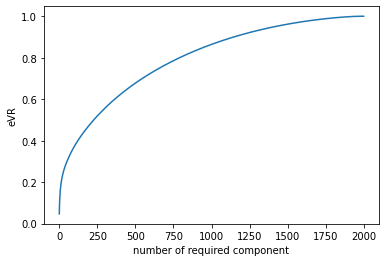

In [74]:
#plotting the percentage of varience of the matrix by 
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of required component")
plt.ylabel("eVR")

**In the selected 2000 components after pca dimensionality reduction we require 1500 components to summarize 90 percent of data** 

In [75]:
#dimensionality reduction after getting to know number of components to summarize
pca=PCA(n_components=1500)
f_pca=pca.fit_transform(df_all)

In [76]:
f_pca

array([[-1.01966782e-01,  2.23438248e-01, -5.42562270e-02, ...,
         8.57007372e-04,  3.00246218e-03, -1.44126546e-02],
       [-4.88369462e-02, -8.99417924e-02, -7.45181441e-02, ...,
        -1.18539834e-03,  4.85700560e-03, -1.19403283e-02],
       [-4.98819217e-02, -9.89006000e-02, -7.57054539e-02, ...,
         1.69473161e-02, -4.54362330e-03,  1.50520360e-02],
       ...,
       [ 2.59397261e-01, -2.26569961e-01, -9.91534900e-02, ...,
        -6.46979359e-05,  4.11550998e-04,  6.05557344e-04],
       [-8.99818058e-02,  4.49422343e-01, -4.76528745e-02, ...,
        -3.50603466e-03, -1.64043883e-03,  1.19732421e-02],
       [ 4.61490250e-01, -1.05981707e-01,  2.73711570e-02, ...,
         4.61345132e-04,  2.69240936e-04,  6.25054594e-04]])

In [77]:
y_df=pd.DataFrame(f_pca)

In [78]:
y_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
count,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,...,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03
mean,4.240852e-17,4.458038e-17,7.270032e-17,2.126141e-17,-5.669710e-17,1.143087e-18,-4.629501e-17,-5.235337e-17,2.903440e-17,4.246567e-17,...,2.939519e-17,1.184524e-17,-4.606640e-17,6.042642e-17,-2.914871e-18,6.894242e-18,4.109397e-17,-2.904155e-17,-4.523051e-17,-5.450023e-17
std,2.125950e-01,1.881181e-01,1.435475e-01,1.214259e-01,1.181920e-01,1.130679e-01,9.313163e-02,8.530585e-02,8.434872e-02,7.996719e-02,...,1.085064e-02,1.084376e-02,1.082693e-02,1.081648e-02,1.078667e-02,1.077174e-02,1.076666e-02,1.075058e-02,1.074550e-02,1.070975e-02
min,-1.724882e-01,-3.155260e-01,-3.355295e-01,-4.927189e-01,-4.196957e-01,-3.231378e-01,-3.935482e-01,-5.090565e-01,-4.730754e-01,-3.631819e-01,...,-4.838302e-02,-4.786338e-02,-5.540164e-02,-5.749320e-02,-5.615843e-02,-4.950690e-02,-5.176186e-02,-5.297241e-02,-5.635904e-02,-4.386167e-02
25%,-8.511347e-02,-1.123717e-01,-5.881121e-02,-5.553781e-02,-5.539952e-02,-6.504342e-02,-2.408953e-02,-3.121856e-02,-2.831809e-02,-4.448644e-02,...,-5.470617e-03,-5.938365e-03,-5.399397e-03,-5.364034e-03,-5.574238e-03,-5.580762e-03,-5.443161e-03,-5.495336e-03,-5.429735e-03,-5.762945e-03
50%,-6.442520e-02,-9.085240e-02,-2.486767e-02,5.900487e-05,1.139823e-03,-2.221658e-02,-6.472169e-03,9.430327e-04,6.416784e-03,-8.637687e-03,...,1.298798e-04,-6.535467e-06,-4.519796e-06,5.075720e-05,-1.105808e-04,-6.206736e-05,-1.386066e-04,-9.593864e-05,-2.098325e-04,-7.727238e-05
75%,-4.578463e-02,7.638249e-02,8.748186e-03,4.814069e-02,5.452924e-02,3.945549e-02,1.590957e-02,3.495595e-02,2.750346e-02,2.947478e-02,...,5.522069e-03,5.673591e-03,5.592344e-03,5.496165e-03,5.568195e-03,5.713290e-03,5.698268e-03,5.821329e-03,5.560521e-03,5.679938e-03
max,9.059746e-01,7.257452e-01,9.018577e-01,7.667122e-01,6.791307e-01,7.222960e-01,5.800129e-01,5.223810e-01,5.319540e-01,4.303833e-01,...,5.973417e-02,5.295551e-02,8.349769e-02,6.132896e-02,6.604227e-02,5.085735e-02,6.283940e-02,5.465226e-02,6.281333e-02,6.263773e-02


# Clustering

# KMeans Clustering 

In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [80]:
#scaling the data
scalar=StandardScaler()
rescaled=scalar.fit_transform(y_df)
scaled_values=rescaled

In [81]:
df2=pd.DataFrame(scaled_values)

In [82]:
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
count,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,...,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7770.000000,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03,7.770000e+03
mean,-1.371704e-18,-7.315755e-18,3.657878e-18,2.743408e-17,4.572347e-18,-5.852604e-17,-1.371704e-17,2.194727e-17,-4.572347e-17,-5.486816e-17,...,1.737492e-17,-5.486816e-18,4.572347e-17,6.401286e-18,0.000000,-6.172669e-18,-3.474984e-17,-1.234534e-17,-1.600321e-17,5.372508e-18
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,...,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-8.113987e-01,-1.677384e+00,-2.337562e+00,-4.058036e+00,-3.551192e+00,-2.858094e+00,-4.225992e+00,-5.967812e+00,-5.608928e+00,-4.541928e+00,...,-4.459290e+00,-4.414196e+00,-5.117353e+00,-5.315674e+00,-5.206615,-4.596292e+00,-4.807916e+00,-4.927718e+00,-5.245236e+00,-4.095754e+00
25%,-4.003808e-01,-5.973852e-01,-4.097251e-01,-4.574097e-01,-4.687548e-01,-5.752970e-01,-2.586778e-01,-3.659839e-01,-3.357480e-01,-5.563444e-01,...,-5.042071e-01,-5.476652e-01,-4.987330e-01,-4.959449e-01,-0.516804,-5.181260e-01,-5.055897e-01,-5.111995e-01,-5.053358e-01,-5.381374e-01
50%,-3.030615e-01,-4.829852e-01,-1.732477e-01,4.859645e-04,9.644439e-03,-1.965015e-01,-6.949932e-02,1.105544e-02,7.607937e-02,-1.080223e-01,...,1.197055e-02,-6.027328e-04,-4.174857e-04,4.692881e-03,-0.010252,-5.762424e-03,-1.287452e-02,-8.924619e-03,-1.952874e-02,-7.215608e-03
75%,-2.153747e-01,4.060609e-01,6.094673e-02,3.964870e-01,4.613910e-01,3.489765e-01,1.708399e-01,4.097983e-01,3.260895e-01,3.686097e-01,...,5.089493e-01,5.232464e-01,5.165551e-01,5.081614e-01,0.516244,5.304301e-01,5.292854e-01,5.415247e-01,5.175078e-01,5.303863e-01
max,4.261780e+00,3.858172e+00,6.283049e+00,6.314646e+00,5.746363e+00,6.388575e+00,6.228284e+00,6.124019e+00,6.307010e+00,5.382346e+00,...,5.505484e+00,4.883817e+00,7.712536e+00,5.670319e+00,6.122975,4.721670e+00,5.836857e+00,5.083985e+00,5.845925e+00,5.849041e+00


**Elbow method to find the number of clusters**

Text(0, 0.5, 'sum of squared distances')

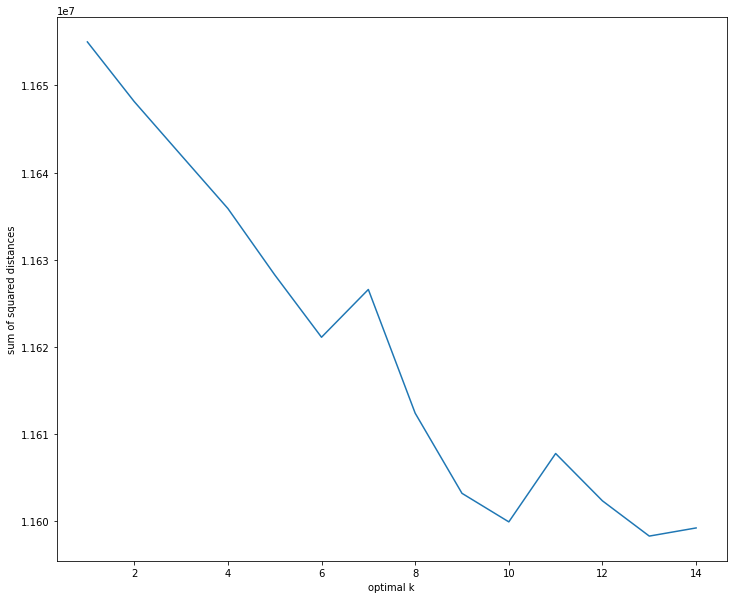

In [85]:
#Implementaing kmeans clustering
#considering range of 10 clusters

silhoutte_score=[]
value=[]
range=np.arange(1,15)
for i in range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
  preds=kmeans.fit(scaled_values)
  pred_values=preds.inertia_
  value.append(pred_values)


plt.figure(figsize=(12,10))
plt.plot(range,value)
plt.xlabel('optimal k')
plt.ylabel('sum of squared distances')
  





***By plotting the optimal k by using Elbow method there are 10 clusters which are optimal**

In [93]:
#applying kmeans after knowing number of clusters 
kmean1= KMeans(n_clusters=10 ,init = 'k-means++' , random_state=30)
labels=kmean1.fit_predict(y_df)

In [94]:
y_df['cluster_number']=labels


In [95]:
y_df['cluster_number'].value_counts()

4    2020
0    1720
3    1295
7     702
1     491
5     400
6     353
8     319
2     306
9     164
Name: cluster_number, dtype: int64

In [89]:
y_df

,0,1,2,3,4,5,6,7,8,9,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,cluster_number
0,-0.101967,0.223438,-0.054256,0.020058,-0.090164,-0.040973,-0.018087,0.032410,-0.007695,-0.046699,...,0.001729,-0.017742,0.005417,-0.004313,0.005421,-0.003315,0.000857,0.003002,-0.014413,3
1,-0.048837,-0.089942,-0.074518,-0.053762,0.000389,0.024036,-0.019577,0.019850,0.015486,-0.033570,...,-0.009367,0.018596,-0.002530,0.002543,0.001190,-0.006372,-0.001185,0.004857,-0.011940,0
2,-0.049882,-0.098901,-0.075705,-0.042848,0.010817,-0.008143,-0.007499,-0.008195,-0.031106,0.068719,...,-0.013824,-0.003603,-0.024334,0.012511,-0.003900,0.007379,0.016947,-0.004544,0.015052,0
3,-0.077552,-0.107703,-0.047392,0.034811,0.103266,-0.096633,0.012229,0.128395,-0.042481,0.036724,...,-0.004220,0.022332,0.007825,0.002839,-0.007028,0.002960,-0.030032,-0.019366,-0.004982,7
4,-0.076268,-0.072507,-0.013367,0.054324,0.074620,-0.082343,-0.000808,0.004674,0.009673,-0.024146,...,-0.006441,-0.010760,0.005973,-0.023940,0.018470,0.011344,-0.006947,-0.002041,-0.030945,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7765,-0.044712,-0.095515,-0.088296,-0.079334,-0.014106,0.042934,-0.024168,0.022426,0.016084,-0.032936,...,-0.001189,-0.003495,0.014906,0.006174,-0.011258,0.007152,-0.004373,-0.010409,-0.006687,0
7766,-0.031423,-0.122413,-0.068923,0.242232,-0.038663,0.274937,0.027200,0.031485,-0.008644,-0.030321,...,0.002387,0.012839,-0.008798,0.002286,0.013526,-0.015441,-0.003087,-0.005827,0.006784,8
7767,0.259397,-0.226570,-0.099153,0.599802,-0.264077,0.569387,-0.052209,-0.021624,0.019902,0.037254,...,-0.000285,0.000179,-0.000307,0.000938,-0.001180,0.000304,-0.000065,0.000412,0.000606,8
7768,-0.089982,0.449422,-0.047653,0.000722,-0.202417,0.003810,0.192247,0.111388,0.311355,0.209545,...,0.001348,-0.003316,-0.003694,-0.005495,-0.005398,-0.002689,-0.003506,-0.001640,0.011973,3


In [90]:
from sklearn.metrics import silhouette_samples

for n_clusters:  2
silhouette_score is: 0.4868018574075213
for n_clusters:  3
silhouette_score is: 0.5108871327995264
for n_clusters:  4
silhouette_score is: 0.3662447304775141
for n_clusters:  5
silhouette_score is: 0.3351665408410492
for n_clusters:  6
silhouette_score is: 0.3274814813882401
for n_clusters:  7
silhouette_score is: 0.28716201560258964
for n_clusters:  8
silhouette_score is: 0.2516384103789277
for n_clusters:  9
silhouette_score is: 0.2548223412256878


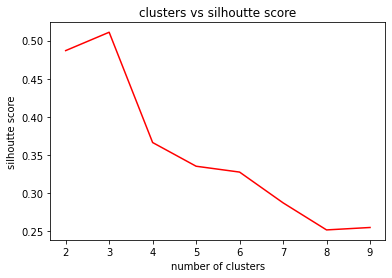

In [97]:
#silhoutte method to find the optimal clusters
#range=np.arange(1,20)
silhoutte_score=[]
value=[]
range=np.arange(2,10)
for i in range:
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=33)
  preds=kmeans.fit(y_df)
  pred_values=preds.labels_
  sil_score=silhouette_score(y_df,pred_values, metric='euclidean')
  silhoutte_score.append(silhouette_score(y_df,pred_values, metric='euclidean'))
  silhouette_values = silhouette_samples(f_pca, pred_values)
  print('for n_clusters: ', i)
  #for value in score:
  print('silhouette_score is: {}'.format(sil_score))

#plotting the grapgh for all the values
plt.plot(range,silhoutte_score,color='red')
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('clusters vs silhoutte score' )
plt.show()
  

In [102]:
import matplotlib.cm as cm


Text(0.5, 0, 'PC1')

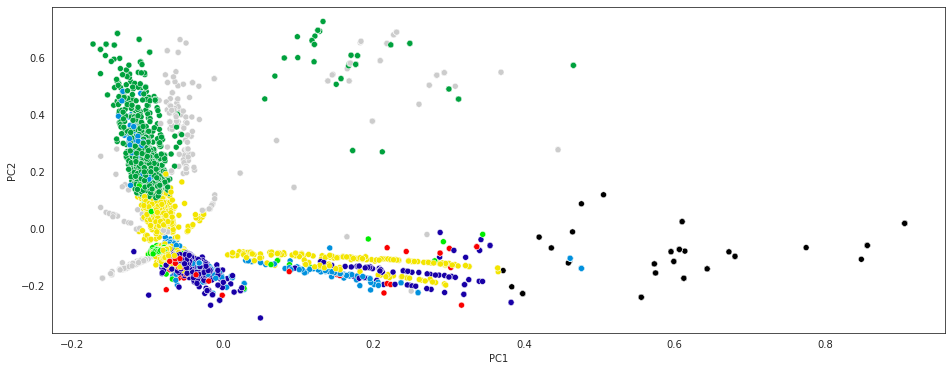

In [105]:
#for n_cluster in range:
colors = cm.nipy_spectral(pred_values.astype(float) /7)
plt.figure(figsize = (16,6))
sns.set_style('white')
sns.scatterplot(f_pca[:,0],f_pca[:,1],c=colors)
plt.ylabel('PC2')
plt.xlabel('PC1')



*   The sihoutte score is highest for 3 clusters and the score is 0.510
*   Cluster 4 has the highest text  values


*   As the number of clusters increases silhoutte decreases that is the quality of the cluster decreases





# Heirarchical clustering

Choosing the number of clusters using dendegram

In [106]:
import scipy.cluster.hierarchy as shc


Text(0, 0.5, 'euclidean distance')

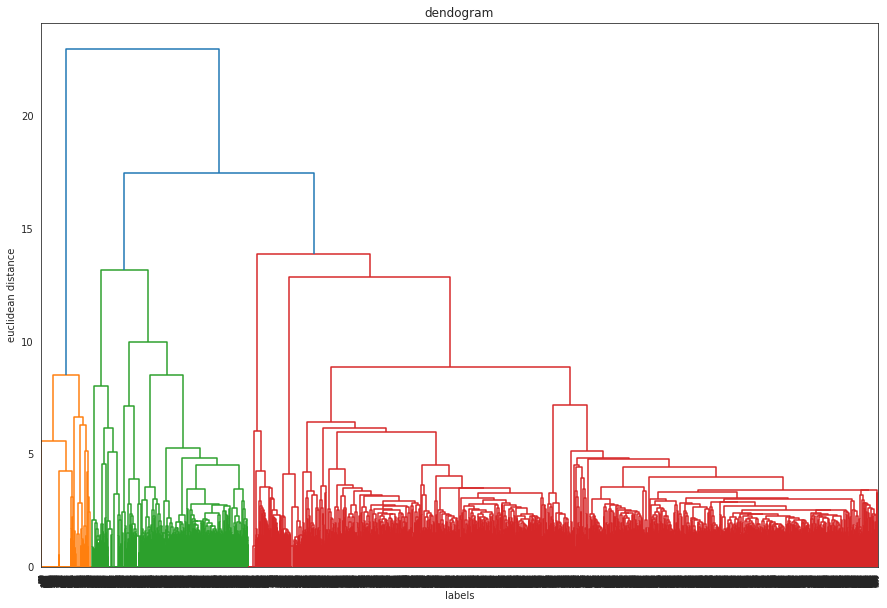

In [107]:
#plotting the dendogram plot to find the clusters
plt.figure(figsize=(15,10))
shc.dendrogram((shc.linkage(f_pca, method ='ward')))
plt.title('dendogram')
plt.xlabel('labels')
plt.ylabel('euclidean distance')

After finding the largest vertical line with maximum distance between the lines we can say that at distance 12 we can pass a horizontal line for which there are 6 clusters

Text(0, 0.5, 'euclidean distance')

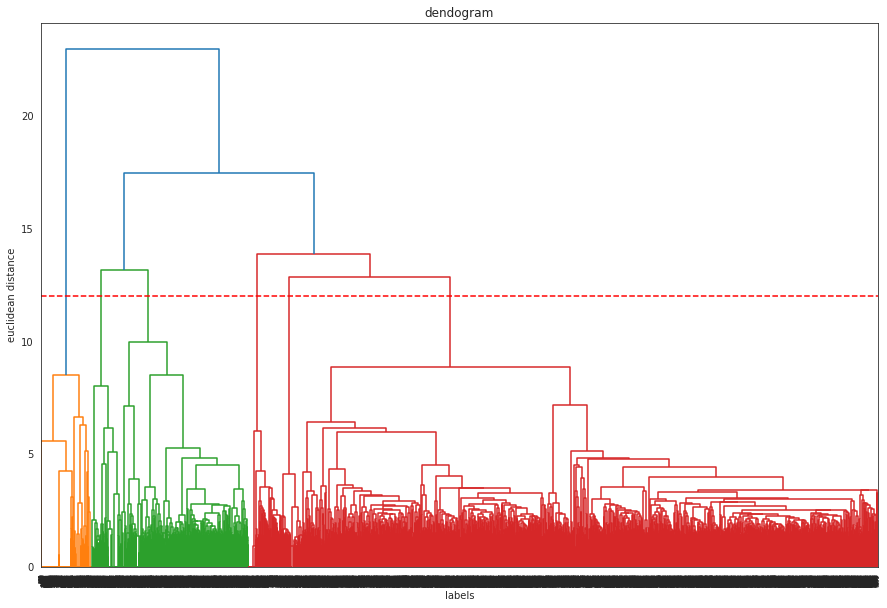

In [108]:
#plotting the dendogram with known clusters and marking a horizontal line for the longest vertical distance
plt.figure(figsize=(15,10))
shc.dendrogram((shc.linkage(f_pca, method ='ward')))
plt.axhline(y=12, color='r', linestyle='--')
plt.title('dendogram')
plt.xlabel('labels')
plt.ylabel('euclidean distance')

**Number of clusters are 6**

In [109]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(f_pca)

for n_clusters:  2
silhouette_score is: 0.4868018574075213
for n_clusters:  3
silhouette_score is: 0.5058571939410821
for n_clusters:  4
silhouette_score is: 0.33035506716876145
for n_clusters:  5
silhouette_score is: 0.28593409563492106
for n_clusters:  6
silhouette_score is: 0.2568479939645979


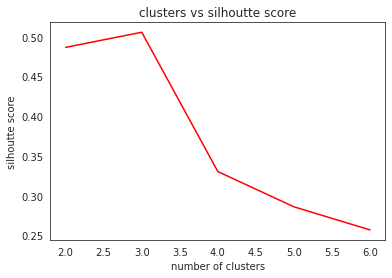

In [112]:
range=np.arange(2,7)
silhoutte_score=[]
for i in range:
 hierarchical = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')  
 hierarchical.fit(y_df)
 hc=hierarchical.fit_predict(y_df)
 lab=hierarchical.labels_
 silhoutte_score.append(silhouette_score(y_df,lab, metric='euclidean'))
 sil_score=silhouette_score(y_df,lab, metric='euclidean')
 print('for n_clusters: ', i)
  #for value in score:
 print('silhouette_score is: {}'.format(sil_score))

#plotting the grapgh for all the values
plt.plot(range,silhoutte_score,color='red')
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.title('clusters vs silhoutte score' )
plt.show()
  

# DBSCAN

In [113]:
from sklearn.cluster import DBSCAN


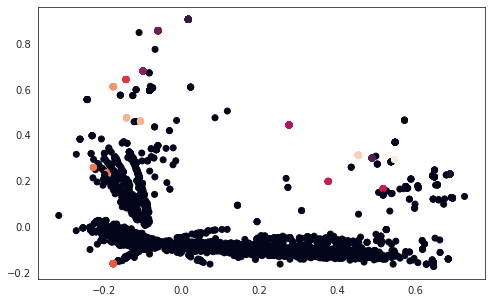

In [119]:
db=DBSCAN(eps=0.3,min_samples=15)
db_pred=db.fit_predict(f_pca)
plt.figure(figsize=( 8 , 5 ))
plt.scatter(y=f_pca[:,0],x= f_pca[:,1], c=db_pred)

# conclusion



*  There are 69% of movie content and 31% of Tv show content in netflix
*  Content of top 10 countries accounts for 69.54% for overall contents present
*   United Nations has highest movie content released and then followed by India
*   United Nations has highest tv show content released and then followed by United Kingdom
*   Netflix started releasing movies after 1940 and after 1980 Tv show content was started streaming.
*   There is a graduall increase in releases after 2000 where movie content releases are more then Tv show content


*    In the month of january, october and december maximum movies/tvshows has been released.
*   Black Mirror: Bandersnatch is the longest movie and Grey's Anatomy is longest Tv show


*   Movies which are documentaries and stand up comedy has highest content in netflix and Tv shows for kids category has highest content in netflix

*   Most of the contents got rating TV_MA(Mature Audience)


*   After vectorizing text data by using TFID and pca dimensionality reduction we require 1500 components to summarize 90 percent of data
*   In k-means clustering Elbow method is used to find the number of optimal clusters and there are 10 clusters after applying kmeans clustering


*   To measure the quality of clusters and how well the clusters are seperated, silhoutte score is considered. 
*   In kmeans clustering the sihoutte score is highest for 3 clusters and the score is 0.510


*   In heirarchical clustering dendrogram plot is used to find the optimal clusters and the number of clusters came out to be 6


*   The silhoutte score for heirarchical cluster is highest for cluster 3 and the silhouette_score is 0.505 
*   By applying kmeans and hierarchical we got the best clusters and optimal cluster equal to 3



